# **Insights from Failed Orders**

This is an assigment project from StrataScratch.In this assigment we will use  two data sets: data_orders and data_offers, both being stored in a CSV format. The data_orders data set with those datasets we will answer:

1.  Build up distribution of orders according to reasons for failure: cancellations
before and after driver assignment, and reasons for order rejection.
Analyse the resulting plot. Which category has the highest number of orders?


2.  Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?


3.  Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?


4.  Plot the distribution of average ETA by hours. How can this plot be explained?


5.  **BONUS** Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.



**Preparing Our Data For Questions**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h3
import folium
import matplotlib
import matplotlib.cm as cm
import branca.colormap
import json
import matplotlib.colors

In [4]:
df1=pd.read_csv('data_orders.csv')
df2=pd.read_csv('data_offers.csv')

df=pd.merge(df1, df2, how='inner',on='order_gk')

df.sample(n=10, random_state=42)



,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [5]:
# Creating new columns before dropping the originals
df["is_driver_assigned"] = np.where(df['is_driver_assigned_key'] == 1, "Yes", "No")

df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")

df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [6]:
df = df.rename(columns={
    "order_datetime": "order_time"
})

In [7]:
df.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled


# **Question 1:** Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

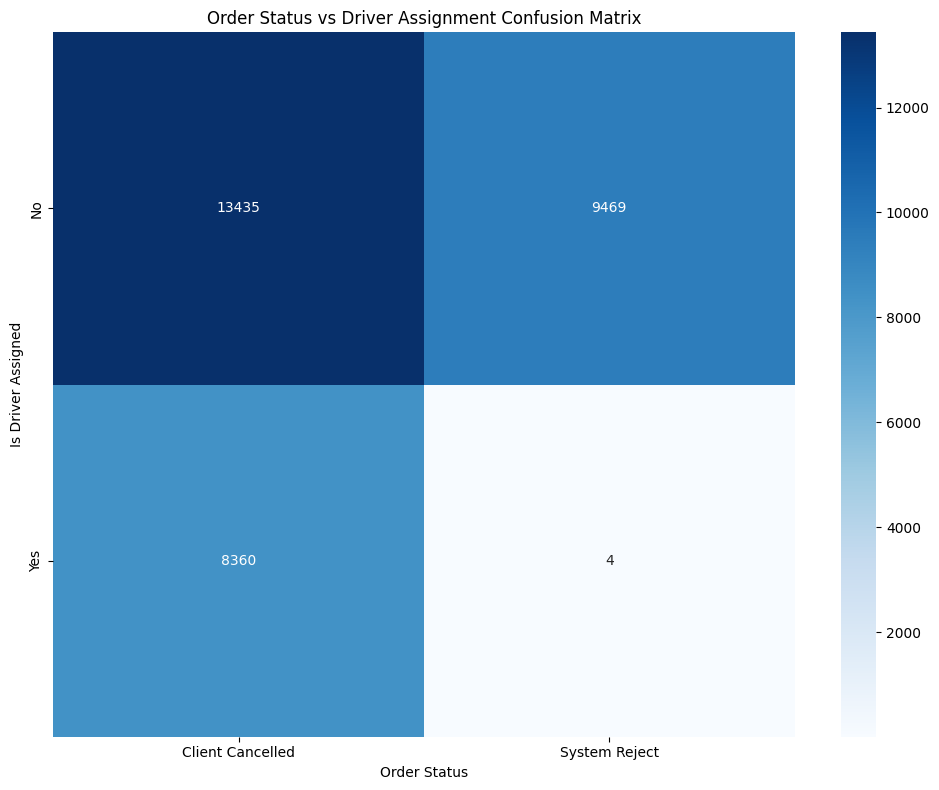

In [8]:
dist_counts = df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count().unstack()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dist_counts,
            annot=True,  # Show numbers in cells
            fmt='g',     # Format numbers as integers
            cmap='Blues',# Use blue color scheme
            cbar=True)   # Show color bar

plt.title('Order Status vs Driver Assignment Confusion Matrix')
plt.ylabel('Is Driver Assigned')
plt.xlabel('Order Status')
plt.tight_layout()
plt.show()

We can see in this matrix orders with no assigned drivers are higher than assigned ones also clients cancel more that system.

One interesting fact about that system very very rarely cancels orders with assigned drivers

**Highest Cancelation Is made by clients when there is no assigned driver**

# **Question 2**: Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

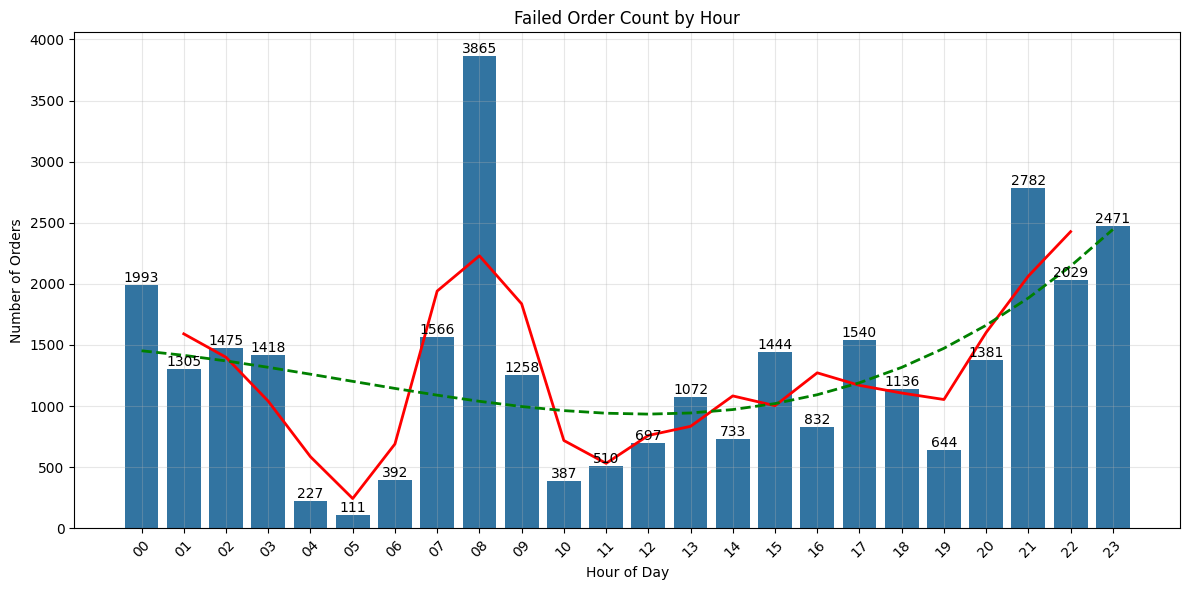

In [9]:
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split: split[0])
hourly_counts = df.groupby(by="order_hour")["order_gk"].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)

# Add rolling average trend line
rolling_mean = hourly_counts.rolling(window=3, center=True).mean()
plt.plot(range(len(hourly_counts)), rolling_mean, color='red', linewidth=2, label='3-Hour Moving Average')


# Add polynomial trend line
z = np.polyfit(range(len(hourly_counts)), hourly_counts, 3)
p = np.poly1d(z)
plt.plot(range(len(hourly_counts)), p(range(len(hourly_counts))),
         color='green', linestyle='--', linewidth=2, label='Polynomial Trend')


plt.title('Failed Order Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(hourly_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

We can see in this graph that number number of failed orders peaks at 8am.Then dips at 9am and 10am after it increases till 2pm after 2pm it goes on a increasing trend but it's not linear or strict as we see at 4pm this increase goes until 7pm after 7pm due to shifts mostly being over it increases rapidly till 9pm it slightly drops at 10pm it's not significant enough to match the increase at 7-9pm

After 11pm till 4am it slowly drops and dumps at 4am till 6am it stays very low and after 6am it rises rapidly and peaks at 8am

**Highest Amount Of Failures happens at 8am**

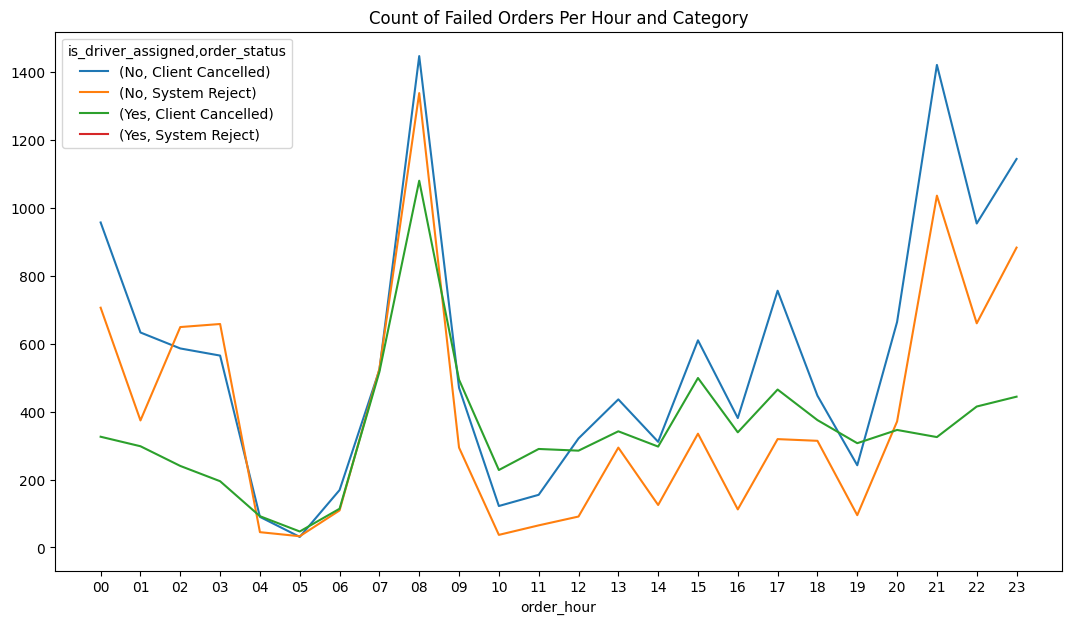

In [10]:
grouped = df.groupby(by=["order_hour", "is_driver_assigned", "order_status"])["order_gk"].count()


_ = grouped.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

The trends could be explained with this graphs as in 8am has the highest amount of non driver assigned orders and increase after 7am could be also explained easly with increase at non assigned orders

**Reason for peaking at cancels is number of no driver assigned orders**

# **Question 3**: Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

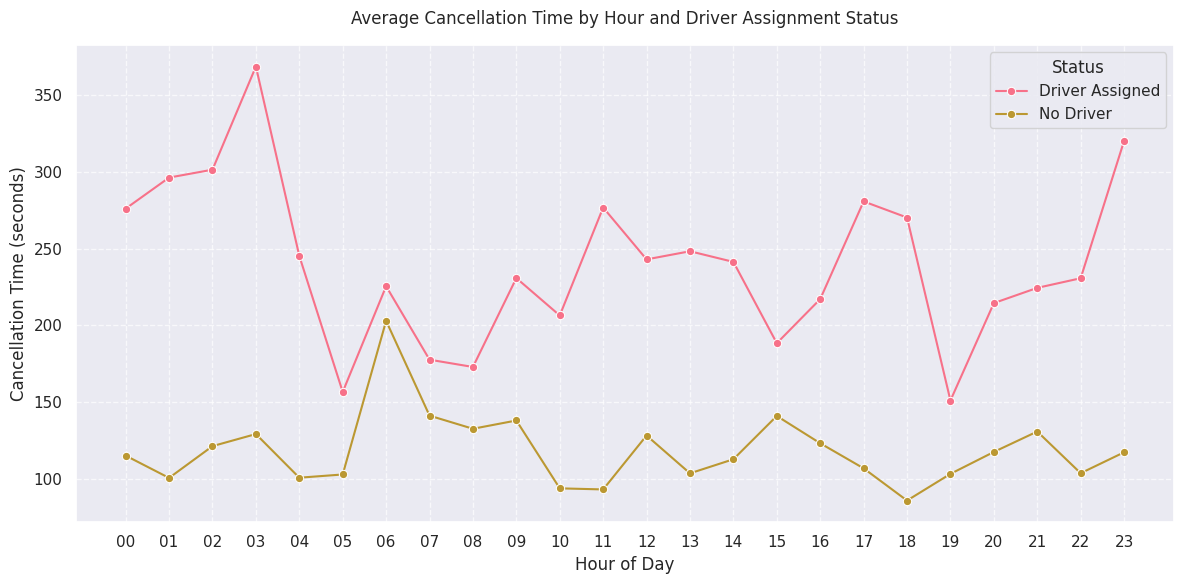

In [14]:
grouped3 = df.groupby(by=["order_hour", "is_driver_assigned"])["cancellations_time_in_seconds"].mean()

grouped3 = df.groupby(by=["order_hour", "is_driver_assigned"])["cancellations_time_in_seconds"].mean()

# Plotting style ayarları
sns.set()
sns.set_palette("husl")

# Plot boyutu ayarlama
plt.figure(figsize=(12, 6))

# Her durum için ayrı line plot
sns.lineplot(data=grouped3.loc[(slice(None), 'Yes')].reset_index(),
            x='order_hour',
            y='cancellations_time_in_seconds',
            label='Driver Assigned',
            marker='o')

sns.lineplot(data=grouped3.loc[(slice(None), 'No')].reset_index(),
            x='order_hour',
            y='cancellations_time_in_seconds',
            label='No Driver',
            marker='o')

# Plot düzenlemeleri
plt.title('Average Cancellation Time by Hour and Driver Assignment Status', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel('Cancellation Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Status')

# x ekseni düzenlemesi
plt.xticks(range(0, 24))

# Layout düzenleme
plt.tight_layout()

plt.show()

In this graph we could see that cancellation time is higher when there is a driver assigned also we could see at 6am has the highest cancellation time without driver but with driver it's one of the lowest cancellation time.


#**Question 4** : Plot the distribution of average ETA by hours. How can this plot be explained?

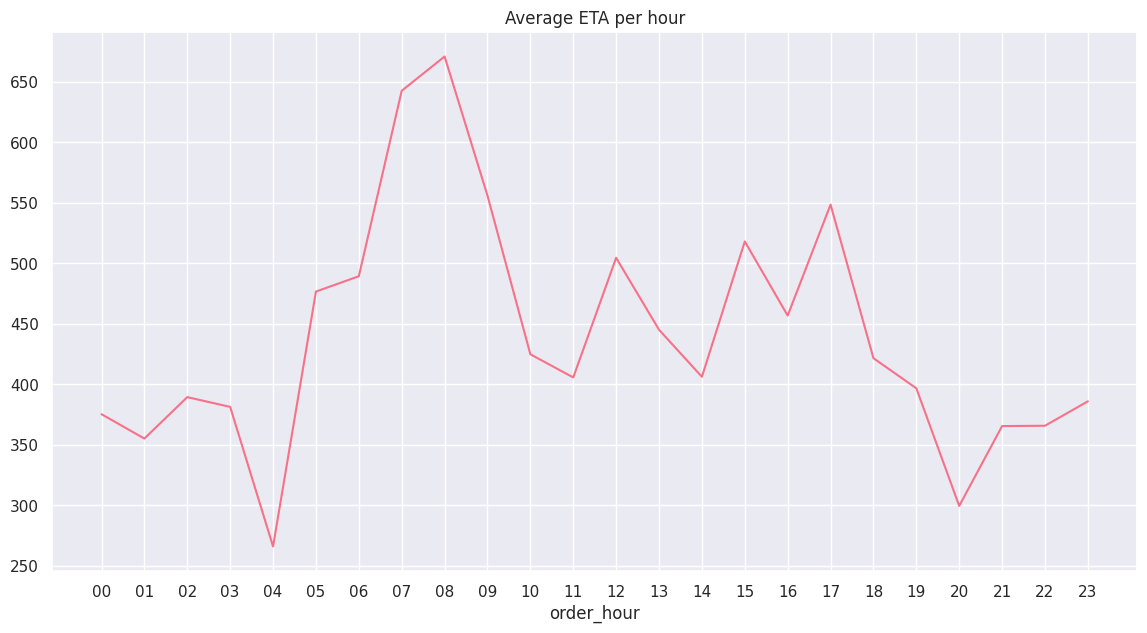

In [16]:
grouped4= df.groupby(by=["order_hour"])["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")


We can see aroun 6-8am where average ETA peaks after that it drops little and after 8 am to 5am it drops and stays low

# **Bouns Question**
**Using the h3 and folium packages, calculate how many size 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map**


In [62]:
# Convert lat/long to h3 indices (resolution 8)
df['hex_id'] = df.apply(lambda row: h3.latlng_to_cell(row['origin_latitude'],
                                                      row['origin_longitude'],
                                                      8), axis=1)

grouped_q5 = df.groupby(by="hex_id")["order_gk"].count()
grouped_q5.shape

grouped_q5 = grouped_q5.reset_index()
grouped_q5.sample(n=5, random_state=42)

# Check if we have valid coordinates
print("Latitude range:", df["origin_latitude"].min(), "-", df["origin_latitude"].max())
print("Longitude range:", df["origin_longitude"].min(), "-", df["origin_longitude"].max())

# Check if we have valid hex IDs and counts
print("\nNumber of hex cells:", len(grouped_q5))
print("Sample of grouped data:")
print(grouped_q5.head())


Latitude range: 51.399523 - 51.496169
Longitude range: -1.066957 - -0.875727

Number of hex cells: 139
Sample of grouped data:
            hex_id  order_gk
0  88195d2801fffff        65
1  88195d2803fffff        14
2  88195d2805fffff        10
3  88195d2807fffff         3
4  88195d2809fffff        46


In [55]:
grouped_q5 = grouped_q5.sort_values(by="order_gk")  # 1
total_orders = grouped_q5["order_gk"].sum()  # 2
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()  # 3
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders  # 4
grouped_q5[grouped_q5["cum_perc"] <= 80]  # 5

,hex_id,order_gk,cum_sum,cum_perc
137,88195d74d5fffff,1,1,0.003198
135,88195d74d1fffff,1,2,0.006396
79,88195d2aebfffff,1,3,0.009594
11,88195d282bfffff,1,4,0.012793
122,88195d3993fffff,1,5,0.015991
...,...,...,...,...
61,88195d2a27fffff,1295,15628,49.980811
20,88195d284dfffff,1937,17565,56.175643
91,88195d2b19fffff,1960,19525,62.444032
87,88195d2b11fffff,2191,21716,69.451196


In [64]:
def to_geojson(row):
    """Transform hex_id into a geojson object with error checking."""
    try:
        # Get the boundary coordinates
        boundary = h3.cell_to_boundary(h=row["hex_id"])

        # H3 returns coordinates as [lat, lng], but GeoJSON expects [lng, lat]
        # Let's swap the coordinates
        boundary = [[coord[1], coord[0]] for coord in boundary]

        geometry = {
            "type": "Polygon",
            "coordinates": [boundary]
        }
        return geojson.Feature(
            id=row["hex_id"],
            geometry=geometry,
            properties={"order_gk": float(row["order_gk"])}  # Ensure the value is float
        )
    except Exception as e:
        print(f"Error processing hex_id {row['hex_id']}: {e}")
        return None

In [63]:
map = folium.Map(
    location=[df["origin_latitude"].mean(), df["origin_longitude"].mean()],
    zoom_start=8.5,
    tiles="cartodbpositron"
)

In [58]:
import matplotlib
# instantiate a colormap object for better visualisation
colormap = matplotlib.cm.get_cmap(name="plasma")
max_order_gk = grouped_q5["order_gk"].max()
min_order_gk = grouped_q5["order_gk"].min()

<ipython-input-58-650e22287ee2>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = matplotlib.cm.get_cmap(name="plasma")


In [ ]:
# Create GeoJSON features with error handling
geojsons = [feature for feature in grouped_q5.apply(func=to_geojson, axis=1).values.tolist() if feature is not None]

# Convert to GeoJSON string with indent for readability
geojson_str = json.dumps(geojson.FeatureCollection(geojsons), indent=2)

# Add GeoJSON to map with modified style function
folium.GeoJson(
    data=geojson_str,
    style_function=lambda f: {
        "fillColor": matplotlib.colors.to_hex(
            colormap((f["properties"]["order_gk"] - min_order_gk) / (max_order_gk - min_order_gk))
        ),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["order_gk"],
        aliases=["Order Count:"],
        style="background-color: white; color: black; font-family: arial; font-size: 12px; padding: 10px;"
    )
).add_to(map)

# Add a colormap legend
#Change cm.LinearColormap to matplotlib.colors.LinearSegmentedColormap
# the colormap object created earlier is used here.
#Remove the reassignment of colormap.
colormap_legend = matplotlib.colors.LinearSegmentedColormap.from_list(
    'CustomMap',
    [matplotlib.colors.to_hex(colormap(i)) for i in np.linspace(0, 1, 8)],
    N=8,
)

#Create a color scale object from branca library
color_scale = branca.colormap.LinearColormap(
    colors=[matplotlib.colors.to_hex(colormap(i)) for i in np.linspace(0, 1, 8)],
    vmin=min_order_gk,
    vmax=max_order_gk,
    caption='Number of Orders'
)

map.add_child(color_scale)

map.save('order_density_map.html')
print("Please open map.html in a web browser to view the visualization.")



In [77]:
# Check the first feature in the GeoJSON
print("Sample GeoJSON feature:")
print(json.dumps(geojsons[0], indent=2))

Sample GeoJSON feature:
{
  "type": "Feature",
  "id": "88195d2801fffff",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          -0.953324,
          51.417807
        ],
        [
          -0.960051,
          51.416558
        ],
        [
          -0.961216,
          51.412055
        ],
        [
          -0.955656,
          51.408801
        ],
        [
          -0.94893,
          51.41005
        ],
        [
          -0.947764,
          51.414553
        ]
      ]
    ]
  },
  "properties": {
    "order_gk": 65.0
  }
}
